In [5]:
import warnings
from awips.dataaccess import DataAccessLayer
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

DataAccessLayer.changeEDEXHost("edex-cloud.unidata.ucar.edu")
request = DataAccessLayer.newDataRequest("radar")
available_locs = DataAccessLayer.getAvailableLocationNames(request)
available_locs.sort()
list(available_locs)
request.setLocationNames("kmhx")a
availableParms = DataAccessLayer.getAvailableParameters(request)
availableParms.sort()
#list(availableParms)

productIDs = DataAccessLayer.getRadarProductIDs(availableParms)
productNames = DataAccessLayer.getRadarProductNames(availableParms)
print(productIDs)
print(productNames)

['134', '138', '169', '170', '172', '176', '177', '32', '56', '78', '80', '94', '99']
['Digital Hybrid Scan Refl', 'Digital Inst Precip Rate', 'Digital Vert Integ Liq', 'Hybrid Hydrometeor Class', 'One Hour Accum', 'One Hour Precip', 'One Hour Unbiased Accum', 'Reflectivity', 'Storm Rel Velocity', 'Storm Total Accum', 'Storm Total Precip', 'Velocity']


In [10]:
productNames['Digital Hybrid Scan Refl']

TypeError: list indices must be integers or slices, not str


Recs :  1
Time : 2019-07-31 17:00:07
Name : kmhx_0.0_230_360_0.0_359.0
Prod : Digital Hybrid Scan Refl
Range: -29.5  to  53.5  (Unit : dBZ )
Size : (230, 360)



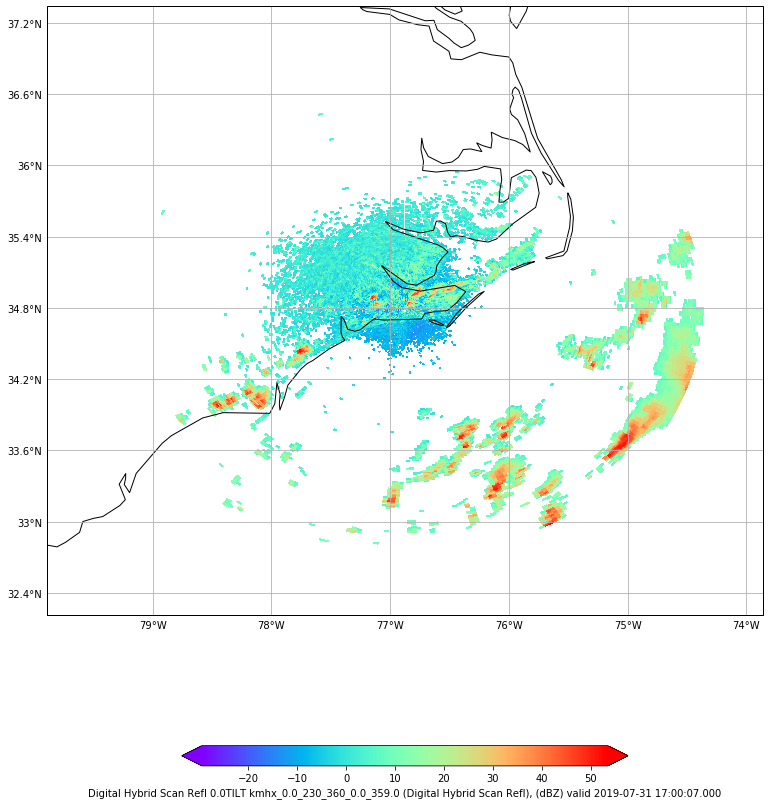

In [13]:
warnings.filterwarnings("ignore",category =RuntimeWarning)

def make_map(bbox, projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(16, 16),
                           subplot_kw=dict(projection=projection))
    ax.set_extent(bbox)
    ax.coastlines(resolution='50m')
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

nexrad_data = {}

for prod in productNames[:1]:
    print(grid)

    request.setParameters(prod)
    availableLevels = DataAccessLayer.getAvailableLevels(request)
    if availableLevels:
        request.setLevels(availableLevels[0])
    else:
        print("No levels found for " + prod)
        continue

    cycles = DataAccessLayer.getAvailableTimes(request, True)
    times = DataAccessLayer.getAvailableTimes(request)

    if times:
        print()
        response = DataAccessLayer.getGridData(request, [times[-1]])
        print("Recs : ", len(response))

        if response:
            grid = response[0]
        else:
            continue
        data = grid.getRawData()
        lons, lats = grid.getLatLonCoords()

        nexrad_data[prod] = data

        print('Time :', str(grid.getDataTime()))
        flat = np.ndarray.flatten(data)
        print('Name :', str(grid.getLocationName()))
        print('Prod :', str(grid.getParameter()))
        print('Range:' , np.nanmin(flat), " to ", np.nanmax(flat), " (Unit :", grid.getUnit(), ")")
        print('Size :', str(data.shape))
        print()

        cmap = plt.get_cmap('rainbow')
        bbox = [lons.min()-0.5, lons.max()+0.5, lats.min()-0.5, lats.max()+0.5]
        fig, ax = make_map(bbox=bbox)
        cs = ax.pcolormesh(lons, lats, data, cmap=cmap)
        cbar = fig.colorbar(cs, extend='both', shrink=0.5, orientation='horizontal')
        cbar.set_label(grid.getParameter() +" " + grid.getLevel() + " " \
                       + grid.getLocationName() + " (" + prod + "), (" + grid.getUnit() + ") " \
                       + "valid " + str(grid.getDataTime().getRefTime()))
        plt.show()